# **Isolating Objects by Color**
*   Apply the HSV thresholding code to extract and display objects of specific colors from an image.



fatal: destination path 'OPenCV_Basics_MEXE4102_Cabarrubia_Cardenas' already exists and is not an empty directory.


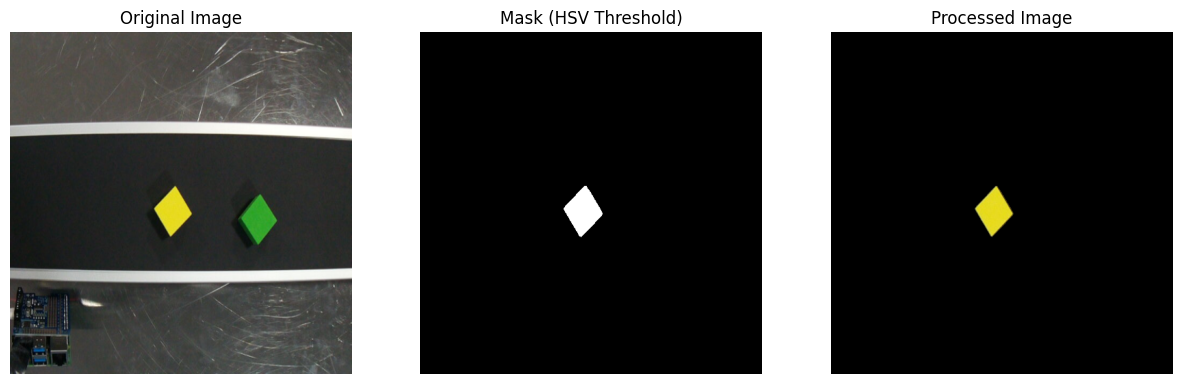

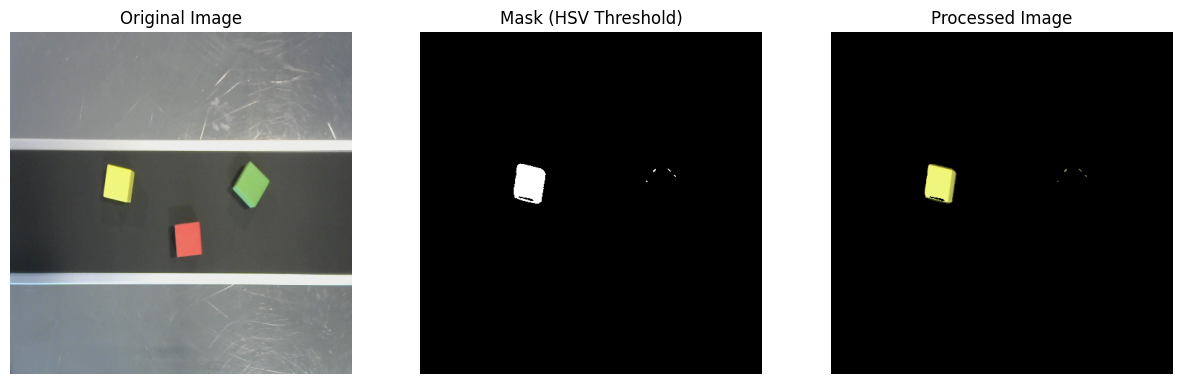

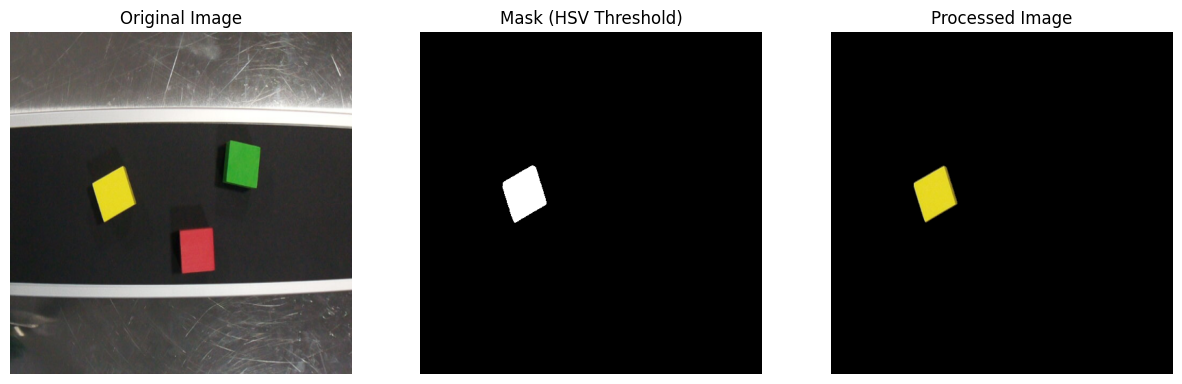

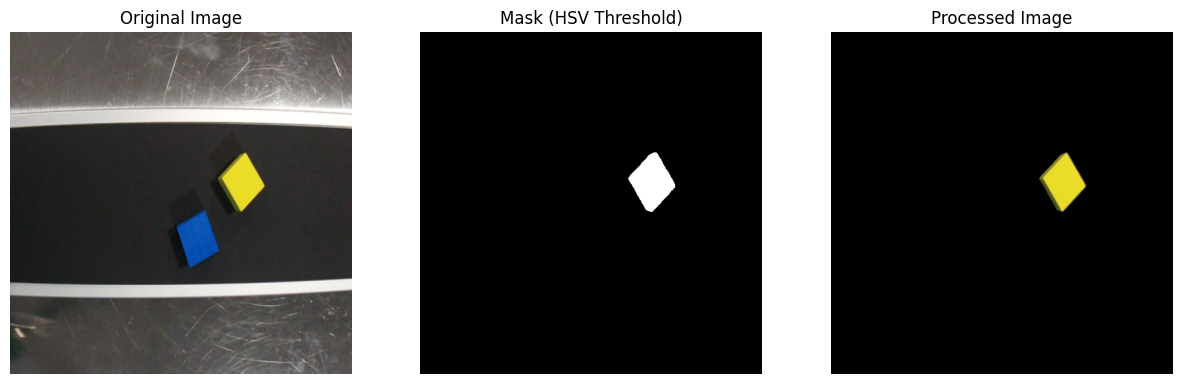

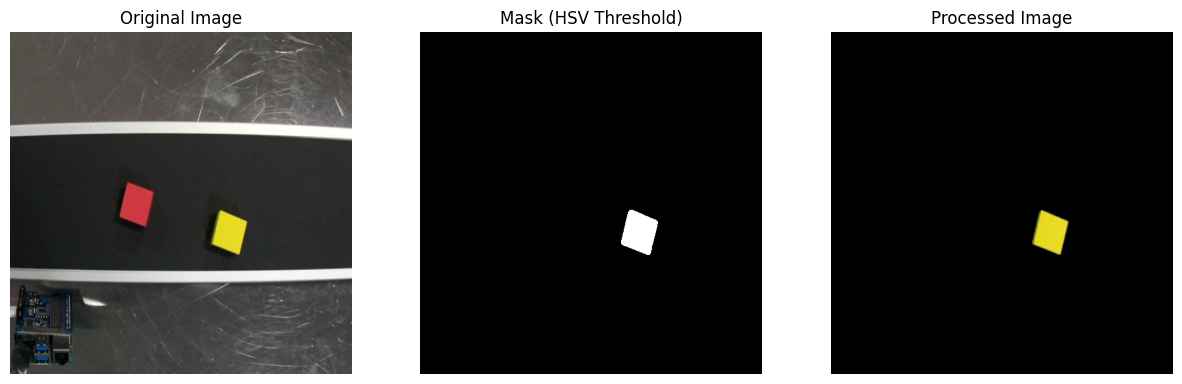

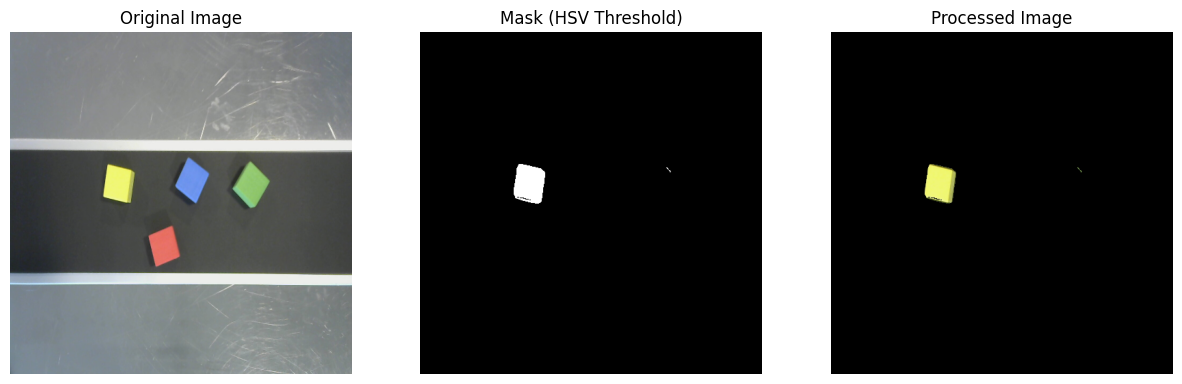

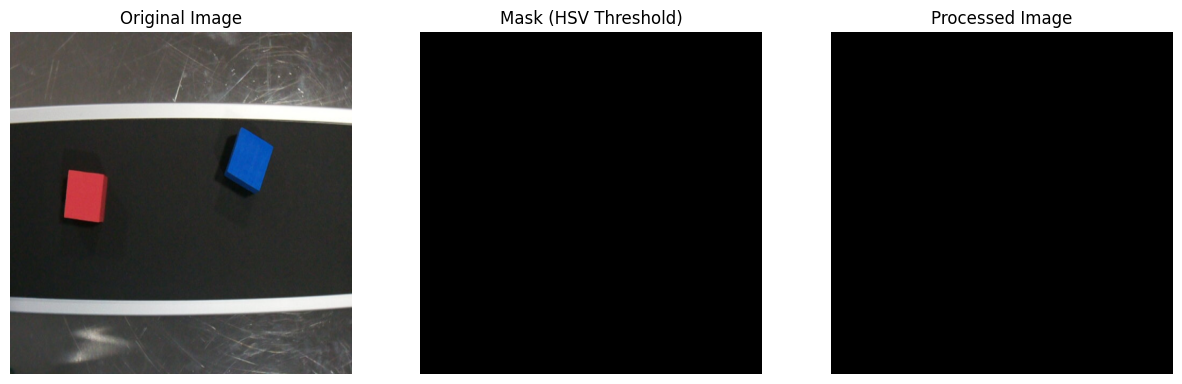

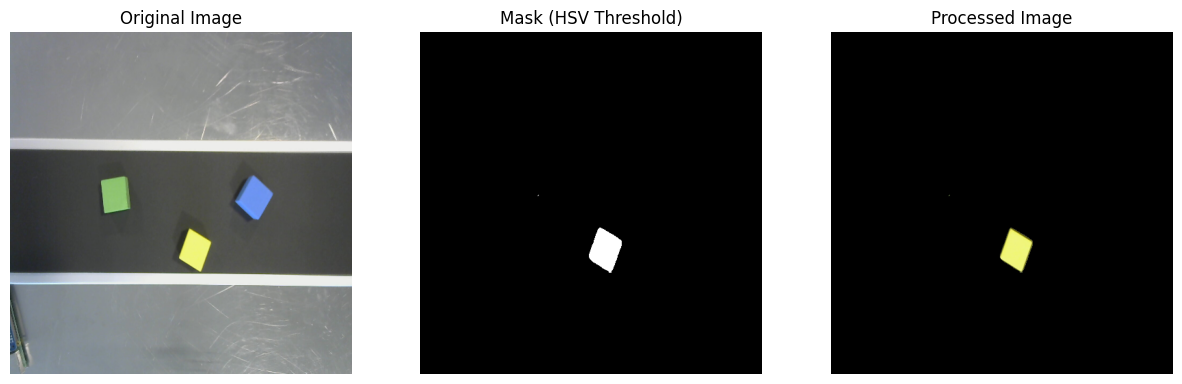

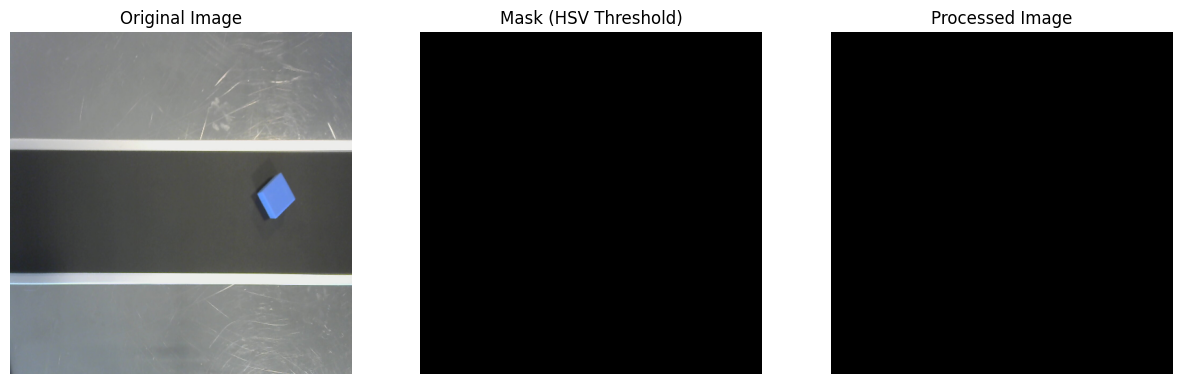

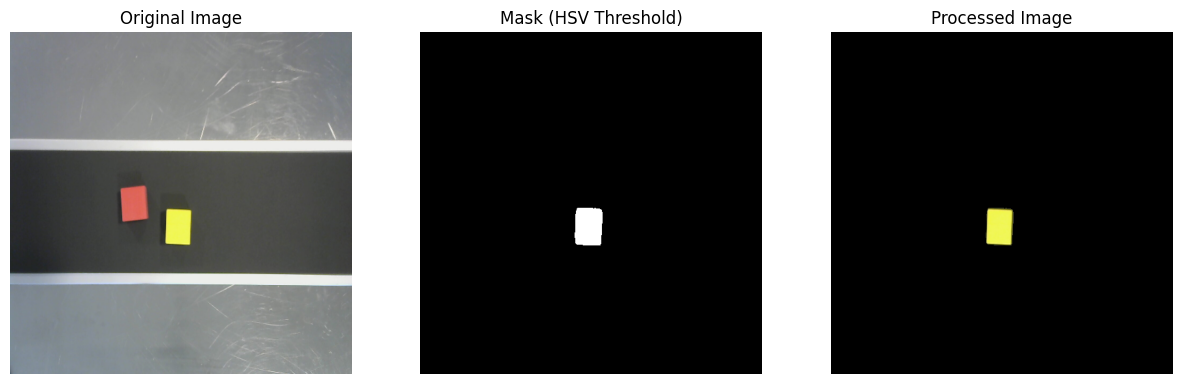

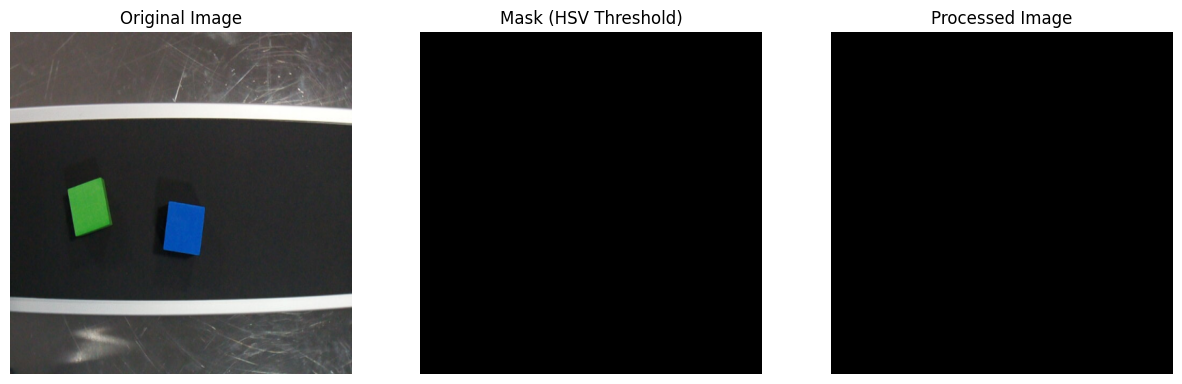

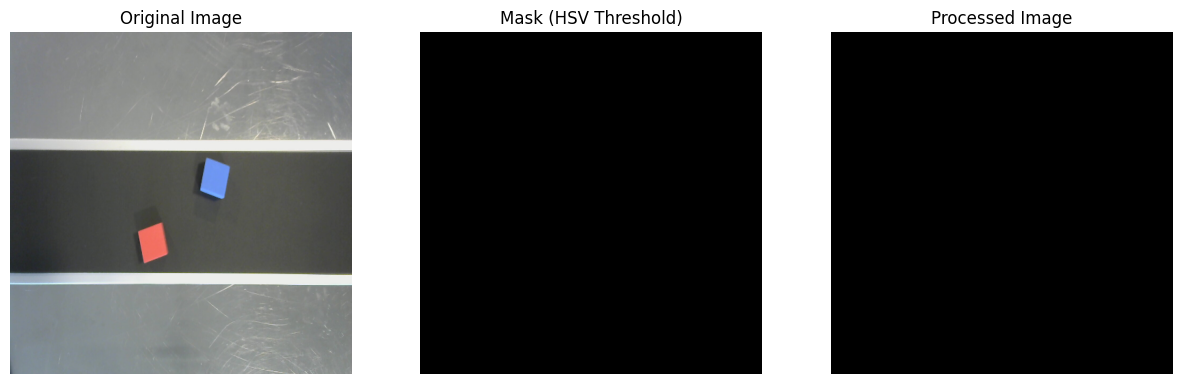

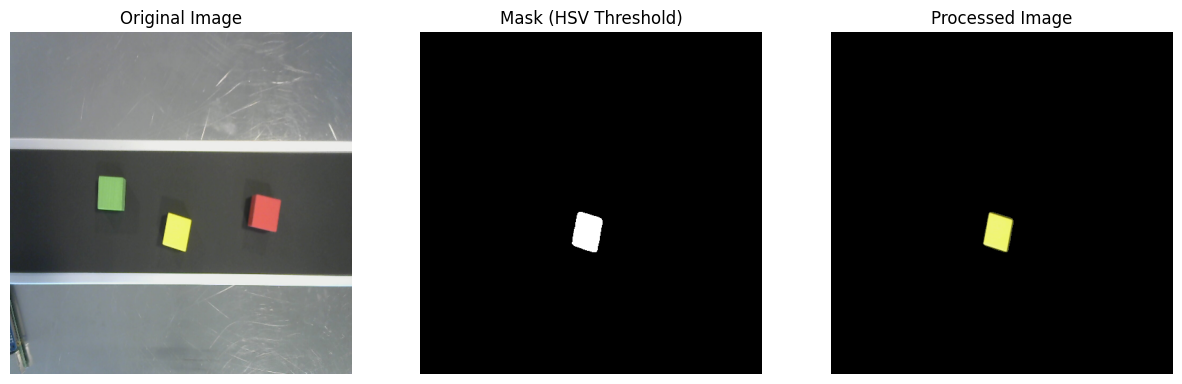

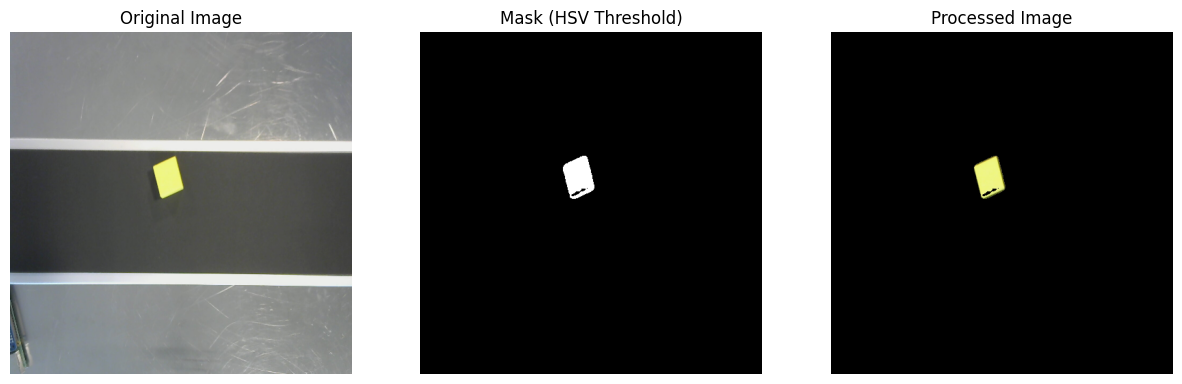

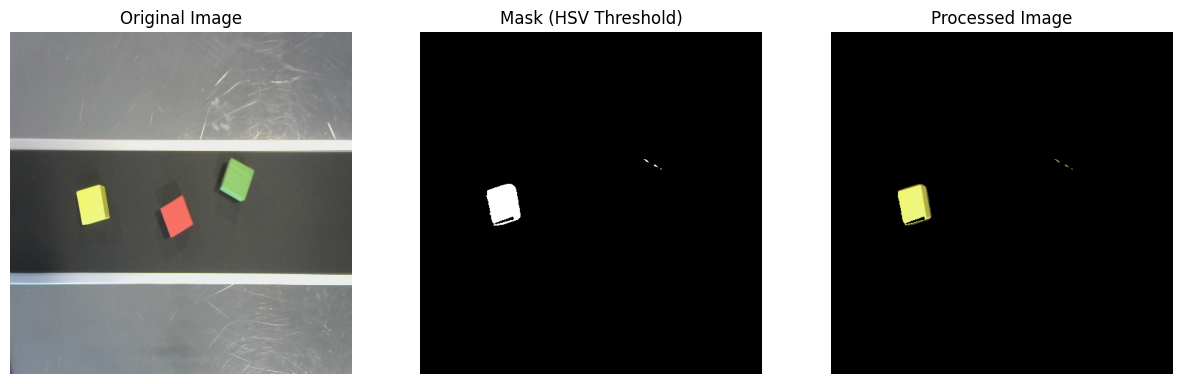

In [29]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Clone the dataset repository
!git clone https://github.com/DaemianMC/OPenCV_Basics_MEXE4102_Cabarrubia_Cardenas.git

# Define the dataset folder
dataset_folder = "/content/OPenCV_Basics_MEXE4102_Cabarrubia_Cardenas/Dataset/Testing"

# Define refined HSV color range for detection
lower_color = np.array([21, 108, 70])  # Adjust based on testing
upper_color = np.array([45, 255, 255])  # Adjust based on testing

# Process all images in the folder
for filename in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, filename)

    # Check file extension to ensure it's an image
    if filename.endswith(('.jpg', '.png', '.jpeg')):

        # Load the image
        image = cv2.imread(file_path)

        # Resize the image for consistency (optional)
        resized_image = cv2.resize(image, (500, 500))

        # Preprocess: Apply Gaussian blur to reduce noise
        blurred_image = cv2.GaussianBlur(resized_image, (5, 5), 0)

        # Convert the image to HSV color space
        hsv_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)

        # Create a mask using the refined HSV color range
        mask = cv2.inRange(hsv_image, lower_color, upper_color)

        # Highlight the isolated colors by combining with the original image
        result = cv2.bitwise_and(resized_image, resized_image, mask=mask)

        # Display intermediate steps and final results
        plt.figure(figsize=(15, 10))

        # Step 1: Original Image
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")

        # Step 2: Mask (Grayscale)
        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap="gray")
        plt.title("Mask (HSV Threshold)")
        plt.axis("off")

        # Step 3: Final Result
        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title("Processed Image")
        plt.axis("off")

        plt.show()
